In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget
%matplotlib inline

import sys
sys.executable

'c:\\Data\\Projects\\phd\\cdl\\env\\Scripts\\python.exe'

In [2]:
from dino.environments.playground import PlaygroundEnvironment
from exlab.interface.graph import display
from dino.utils.move import MoveConfig
env = PlaygroundEnvironment()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
Loading chipmunk for Windows (64bit) [c:\Data\Projects\phd\cdl\env\lib\site-packages\pymunk\chipmunk.dll]
2020-11-05 13:31:04 RedSky exlogger:c[2240] INFO [modular] Module 'PlaygroundEnvironment' has been started


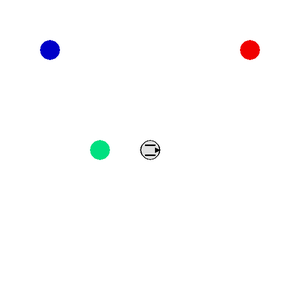

In [3]:
# env.displayGui(True)
env.image()

In [4]:
from cdl.agents.learners.curiosity.saggriac import SAGGLearner
learner = SAGGLearner(env.world.findHost())
learner.adaptiveModels = False

2020-11-05 13:31:04 RedSky exlogger:c[2240] INFO [modular] Module 'ModelDataset' has been started
2020-11-05 13:31:04 RedSky exlogger:c[2240] INFO [modular] Module 'ModelDataset' has been started
2020-11-05 13:31:04 RedSky exlogger:c[2240] INFO [modular] Module 'Agent' has been started
2020-11-05 13:31:04 RedSky exlogger:c[2240] INFO [modular] Module 'Performer' has been started
2020-11-05 13:31:04 RedSky exlogger:c[2240] INFO [modular] Module 'planner' has been started
2020-11-05 13:31:04 RedSky exlogger:c[2240] INFO [modular] Module 'ModelDataset' has been attached to 'Agent'
2020-11-05 13:31:04 RedSky exlogger:c[2240] INFO [modular] Module 'InterestModelManager' has been started
2020-11-05 13:31:04 RedSky exlogger:c[2240] INFO [modular] Module 'Strategy autonomousStrategy' has been started
2020-11-05 13:31:04 RedSky exlogger:c[2240] INFO [modular] Module 'Strategy autonomousStrategy' has been started


In [5]:
# learner.propertySpace('Agent.move')

In [6]:
# learner.save()

In [7]:
# from dino.data.space import Space
# Space._deserialize(learner.save()['dataset']['spaces'][0], env.deserializer())

In [8]:
env.evaluate()

2020-11-05 13:31:05 RedSky exlogger:c[2240] WARNING [strategy] Planning failed for goal Goal[#12↝👁'#Agent.position'↕2 @☰ 200.000,  200.000], switching to random
2020-11-05 13:31:05 RedSky exlogger:c[2240] WARNING [strategy] Planning failed for goal Goal[#12↝👁'#Agent.position'↕2 @☰ 400.000,  200.000], switching to random
2020-11-05 13:31:05 RedSky exlogger:c[2240] WARNING [strategy] Planning failed for goal Goal[#12↝👁'#Agent.position'↕2 @☰ 200.000,  400.000], switching to random
2020-11-05 13:31:05 RedSky exlogger:c[2240] WARNING [strategy] Planning failed for goal Goal[#12↝👁'#Agent.position'↕2 @☰ 400.000,  400.000], switching to random
2020-11-05 13:31:05 RedSky exlogger:c[2240] WARNING [strategy] Planning failed for goal Goal[#30↝👁'#Cylinder1.position'↕2 @☰±-50.000,  0.000], switching to random
2020-11-05 13:31:05 RedSky exlogger:c[2240] WARNING [strategy] Planning failed for goal Goal[#30↝👁'#Cylinder1.position'↕2 @☰± 50.000,  0.000], switching to random
2020-11-05 13:31:05 RedSky exl

In [29]:
# env.evaluators[0].serialize()
learner.save('Blah')

2020-11-05 13:39:36 RedSky exlogger:c[2240] INFO [load] Create database at c:\data\projects\phd\dino\databases\PlaygroundEnvironment\0
c:\data\projects\phd\dino\databases\PlaygroundEnvironment\0


Database c:\data\projects\phd\dino\databases\PlaygroundEnvironment\0

In [24]:
from dino.utils.database import Database

c:\data\projects\phd\dino\databases


In [25]:
print(Database.databasedir)

None


In [10]:
# d = env.deserializer()
# d.deserialize(learner.save()['dataset'], obj=learner.dataset)

In [6]:
from cdl.agents.tools.models.interest_model import InterestModel
mMove = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('Agent.position'), learner.propertySpace('Agent.lidar'))
mObject = InterestModel(learner.dataset, learner.propertySpace('Agent.position'), learner.propertySpace('#Cylinder1.positionToAgent'), learner.propertySpace('#Cylinder1.positionToAgent'))
mButton = InterestModel(learner.dataset, learner.propertySpace('Agent.position'), learner.propertySpace('#Button1.pressed'), learner.propertySpace('#Cylinder1.position'))
# mrp = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('#Cylinder1.positionToAgent'))
# mrp = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('#Cylinder1.positionToAgent'), learner.propertySpace('#Cylinder1.positionToAgent'))
# mo = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('#Cylinder1.position'), learner.propertySpace('#Cylinder1.positionToAgent'), register=False)
# mo2 = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('#Cylinder2.position'), learner.propertySpace('#Cylinder2.positionToAgent'), register=False)

2020-11-02 16:11:03 RedSky exlogger:c[1036] INFO [model] New model added: ModelInterestModel(@☰#12↝🕹'#Agent.move'↕2 | @☰#15↝👁'#Agent.lidar':PRE↕8 => @☰#13↝👁'#Agent.position'↕2)
2020-11-02 16:11:03 RedSky exlogger:c[1036] INFO [model] New model added: ModelInterestModel(@☰#13↝👁'#Agent.position'↕2 | @☰#19↝👁'#Cylinder1.positionToAgent':PRE↕2 => @☰#18↝👁'#Cylinder1.positionToAgent'↕2)
2020-11-02 16:11:03 RedSky exlogger:c[1036] INFO [model] New model added: ModelInterestModel(@☰#13↝👁'#Agent.position'↕2 | @☰#24↝👁'#Cylinder1.position':PRE↕2 => @☰#22↝👁'#Button1.pressed'↕1)


In [12]:
# mc = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('Agent.position'), learner.propertySpace('Agent.lidar'))
# mrpp = InterestModel(learner.dataset, learner.propertySpace('Agent.position'), learner.propertySpace('#Cylinder1.positionToAgent'), learner.propertySpace('#Cylinder1.positionToAgent'))
# mop = InterestModel(learner.dataset, learner.propertySpace('Agent.position'), learner.propertySpace('#Cylinder1.position'), learner.propertySpace('#Cylinder1.positionToAgent'))

In [13]:
from exlab.modular.logger import Logger, logger, logging
# logger().setRecordLevel(Logger.DEBUG2, 'performer')
# logger().setDisplayLevel(Logger.DEBUG2, 'performer')
# logger().setRecordLevel(logging.DEBUG, 'strategy')
# logger().setDisplayLevel(logging.DEBUG, 'strategy')
# logger().setRecordLevel(Logger.DEBUG2, 'plan')
# logger().setDisplayLevel(Logger.DEBUG2, 'plan')
# logger().display(tag='plan')

In [14]:
competences = {}

In [16]:
for _ in range(1):
    learner.train(10)
    env.run()

    competences[learner.iteration] = learner.dataset.competences(precise=True)

2020-11-01 19:20:47 RedSky exlogger:c[23888] INFO [interest] Creating interestMap for model ModelInterestModel(@☰#12↝🕹'#Agent.move'↕2 | @☰#15↝👁'#Agent.lidar':PRE↕8 => @☰#13↝👁'#Agent.position'↕2), strategy Strategy autonomousStrategy
2020-11-01 19:20:47 RedSky exlogger:c[23888] INFO [interest] Creating interestMap for model ModelInterestModel(@☰#13↝👁'#Agent.position'↕2 | @☰#19↝👁'#Cylinder1.positionToAgent':PRE↕2 => @☰#18↝👁'#Cylinder1.positionToAgent'↕2), strategy Strategy autonomousStrategy
2020-11-01 19:20:48 RedSky exlogger:c[23888] WARNING [strategy] Planning failed for goal Data[#18↝👁'#Cylinder1.positionToAgent'↕2 @☰± 2.137, -3.427], switching to random


## Results

In [ ]:
# %prun -s cumtime learner.train(20)

In [11]:
env.evaluate()

@@@
Goal[#20↝👁'#Agent.position'↕2 @☰ 264.236,  544.653]
State ([SingleData(#0→👁'#Agent.position'↕2 @[' 64.236', ' 344.653']), SingleData(#1→👁'#Agent.positionToAgent'↕2 @[' 0.000', ' 0.000']), SingleData(#2→👁'#Agent.color'↕3 @[' 0.000', ' 0.000', ' 0.000']), SingleData(#3→👁'#Agent.lidar'↕8 @[' 100.000', ' 100.000', ' 100.000', ' 100.000', ' 100.000', ' 100.000', ' 100.000', ' 32.038']), SingleData(#5→👁'#Cylinder1.position'↕2 @[' 99.454', ' 294.756']), SingleData(#6→👁'#Cylinder1.positionToAgent'↕2 @[' 35.217', '-49.897']), SingleData(#7→👁'#Cylinder1.color'↕3 @[' 0.000', ' 224.000', ' 128.000']), SingleData(#8→👁'#Cylinder2.position'↕2 @[' 312.560', ' 348.928']), SingleData(#9→👁'#Cylinder2.positionToAgent'↕2 @[' 248.324', ' 4.274']), SingleData(#10→👁'#Cylinder2.color'↕3 @[' 0.000', ' 224.000', ' 128.000']), SingleData(#11→👁'#Cylinder3.position'↕2 @[' 500.000', ' 100.000']), SingleData(#12→👁'#Cylinder3.positionToAgent'↕2 @[' 435.764', '-244.653']), SingleData(#13→👁'#Cylinder3.color'↕3 @[' 2

In [12]:
env.evaluators[0].evaluations

{195: Evaluation @t=195 µ=0.04283396892467897 σ=0.06312187796303076 (1 test(s)),
 345: Evaluation @t=345 µ=0.25707087000116297 σ=0.4290582743440548 (1 test(s))}

In [14]:
env.evaluators[0].evaluations[345].results[0].results

[(0.00013047093061779172,
  Goal[#20↝👁'#Agent.position'↕2 @☰± 200.000,  200.000],
  Goal[#20↝👁'#Agent.position'↕2 @☰ 264.240,  544.645]),
 (1.0,
  Goal[#20↝👁'#Agent.position'↕2 @☰± 400.000,  200.000],
  Goal[#20↝👁'#Agent.position'↕2 @☰ 568.452,  740.402]),
 (0.0016381171337597551,
  Goal[#20↝👁'#Agent.position'↕2 @☰± 200.000,  400.000],
  Goal[#20↝👁'#Agent.position'↕2 @☰ 768.425,  1140.517]),
 (0.02651489194027423,
  Goal[#20↝👁'#Agent.position'↕2 @☰± 400.000,  400.000],
  Goal[#20↝👁'#Agent.position'↕2 @☰ 1170.319,  1540.752])]

In [15]:
learner.dataset.invalidateCompetences()
learner.dataset.competences(precise=True)

{ModelInterestModel(@☰#57↝🕹'#Agent.move'↕2 | @☰#60↝👁'#Agent.lidar':PRE↕8 => @☰#58↝👁'#Agent.position'↕2): 0.9445502215788936,
 ModelInterestModel(@☰#58↝👁'#Agent.position'↕2 | @☰#64↝👁'#Cylinder1.positionToAgent':PRE↕2 => @☰#63↝👁'#Cylinder1.positionToAgent'↕2): 0.7930377534847226,
 ModelInterestModel(@☰#58↝👁'#Agent.position'↕2 | @☰#69↝👁'#Cylinder1.position':PRE↕2 => @☰#67↝👁'#Button1.pressed'↕1): 1.0}

In [13]:
learner.dataset.models

[ModelInterestModel(@☰#57↝🕹'#Agent.move'↕2 | @☰#60↝👁'#Agent.lidar':PRE↕8 => @☰#58↝👁'#Agent.position'↕2),
 ModelInterestModel(@☰#58↝👁'#Agent.position'↕2 | @☰#64↝👁'#Cylinder1.positionToAgent':PRE↕2 => @☰#63↝👁'#Cylinder1.positionToAgent'↕2),
 ModelInterestModel(@☰#58↝👁'#Agent.position'↕2 | @☰#69↝👁'#Cylinder1.position':PRE↕2 => @☰#67↝👁'#Button1.pressed'↕1)]

In [ ]:
mrpp.contextSpacialization[0].allTrue()

In [ ]:
learner.dataset.models[1].invalidateCompetences()
learner.dataset.models[1].competence(precise=True)

In [ ]:
learner.adaptiveModelManager.evaluateModels(None)

In [ ]:
[model.lowCompetenceSince for model in learner.dataset.enabledModels()]

In [ ]:
competences

In [ ]:
[config.model for config in learner.configHistory]

In [ ]:
# learner.interestModel.sampleBestPoint()

In [ ]:
from exlab.modular.logger import Logger, logger, logging
# logger().setRecordLevel(Logger.DEBUG2, 'performer')
# logger().setDisplayLevel(Logger.DEBUG2, 'performer')
# logger().setRecordLevel(Logger.DEBUG2, 'strategy')
# logger().setDisplayLevel(Logger.DEBUG2, 'strategy')
logger().setRecordLevel(Logger.DEBUG2, 'plan')
logger().setDisplayLevel(Logger.DEBUG2, 'plan')
# logger().setRecordLevel(logging.DEBUG, 'plan')
# logger().setDisplayLevel(logging.DEBUG, 'plan')
# logger().display(tag='plan')

In [ ]:
learner.dataset.competences(precise=True)

In [ ]:
learner.dataset.competences(precise=True)

In [ ]:
# mrpp.contextSpacialization[0].allTrue()

In [ ]:
# mrp.contextSpacialization[1]._resetAreas()

In [ ]:
[area.columns for area in learner.dataset.models[1].contextSpacialization[0].areas]

In [ ]:
display(learner.dataset.models[1].contextSpacialization[0].visualizeAreas())

In [ ]:
display(learner.dataset.models[2].contextSpacialization[0].visualizeAreas())

In [ ]:
# mrp.eventForwardError(467)

In [ ]:
# eventId = 85
# action = mrp.actionSpace.getPoint(eventId)[0]
# outcome = mrp.outcomeSpace.getPoint(eventId)[0]
# context = mrp.contextSpace.getPoint(eventId)[0]
# print(action)
# mrp.inverse(outcome, context=context)

## Planning

In [ ]:
goal = learner.propertySpace('#Cylinder1.positionToAgent').point([50, 0]).setRelative(False)
learner.planner.planDistance(goal)

In [ ]:
mrpp.inverse(learner.propertySpace('#Cylinder1.positionToAgent').goal([-10.882,  11.432]), context=env.state().context())

In [ ]:
mrpp.forward(learner.propertySpace('Agent.position').action([10.960, -10.059]), context=env.state().context())

In [ ]:
mrp.inverse(learner.propertySpace('#Cylinder1.positionToAgent').action([3, 0]), context=context)

In [ ]:
mrp.inverse(learner.propertySpace('#Cylinder1.positionToAgent').action([3, 0]), context=env.state().context())

In [ ]:
learner.reach(learner.propertySpace('Agent.position').point([50, 0]).setRelative(True))
env.run()

In [ ]:
config = MoveConfig(goal=learner.propertySpace('#Cylinder1.positionToAgent').point([-60, 0]).setRelative(False))
config.plannerSettings.dontMoveSpaces.append(learner.propertySpace('#Cylinder1.position'))
learner.reach(config)
env.run()

In [ ]:
env.world.observe()

In [ ]:
learner.reach(learner.propertySpace('#Cylinder1.position').point([50, 0]).setRelative(True))
env.run()

In [ ]:
mrpp.forward(learner.propertySpace('Agent.position').action([22.107, -2.817]), context=env.state().context())

In [ ]:
mrpp.inverse(learner.propertySpace('#Cylinder1.positionToAgent').action([-12.170,  0.149]), context=env.state().context())

In [ ]:
learner.propertySpace('Agent.move').convertTo(spaceManager=learner.dataset)

In [ ]:
learner.reach(learner.propertySpace('#Cylinder1.position').point([0, -10]).setRelative(True))
env.run()

In [ ]:
learner.propertySpace('Agent.position').point([0, 0])

In [ ]:
learner.dataset.spaces

In [ ]:
learner.dataset.spaces[7].maxDistancePerColumn

In [ ]:
learner.propertySpace('Agent.move').maxDistancePerColumn

No handles with labels found to put in legend.
No handles with labels found to put in legend.


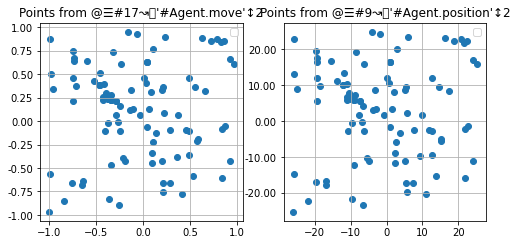

In [21]:
display(learner.propertySpace('Agent.move').visualizeData(), learner.propertySpace('Agent.position').visualizeData())

No handles with labels found to put in legend.
No handles with labels found to put in legend.


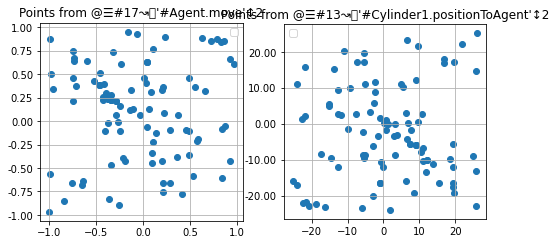

In [22]:
display(learner.propertySpace('Agent.move').visualizeData(), learner.propertySpace('#Cylinder1.positionToAgent').visualizeData())

No handles with labels found to put in legend.
No handles with labels found to put in legend.


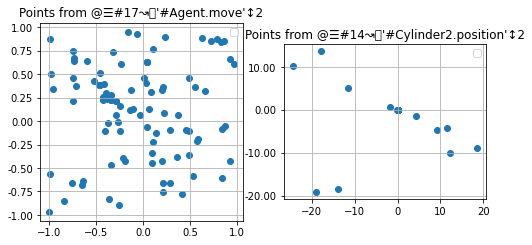

In [33]:
display(learner.propertySpace('Agent.move').visualizeData(), learner.propertySpace('#Cylinder2.position').visualizeData())

No handles with labels found to put in legend.
No handles with labels found to put in legend.


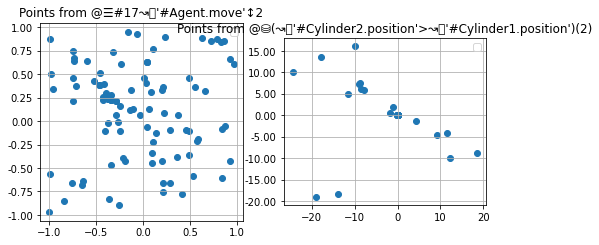

In [34]:
display(aff.actionSpace.visualizeData(), aff.outcomeSpace.visualizeData())

No handles with labels found to put in legend.
No handles with labels found to put in legend.


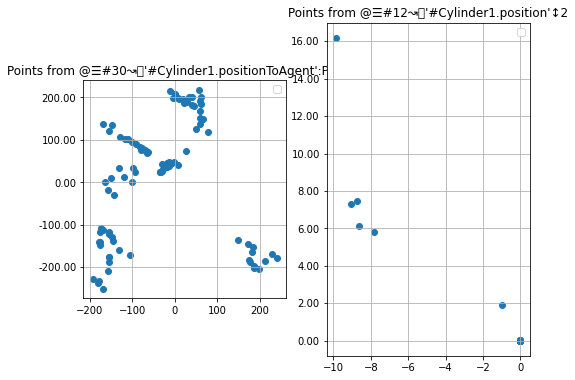

In [32]:
from dino.data.space import SpaceKind
display(learner.propertySpace('#Cylinder1.positionToAgent', kind=SpaceKind.PRE).visualizeData(), learner.propertySpace('#Cylinder1.position').visualizeData())

In [119]:
mo.actionSpace.data[:20]

array([[-0.25331488, -0.89859617],
       [ 0.19913586, -0.42603308],
       [ 0.85776562,  0.84943936],
       [ 0.41702487, -0.77677691],
       [ 0.72028399,  0.85375691],
       [ 0.55593333,  0.36628716],
       [-0.32595367,  0.73266635],
       [-0.52487767,  0.42794971],
       [-0.84043172, -0.85358504],
       [ 0.09153772, -0.33514056],
       [ 0.84139683, -0.60729117],
       [ 0.10070018, -0.22219897],
       [-0.71488417,  0.37524856],
       [ 0.8707666 , -0.0557131 ],
       [-0.06767051,  0.92296766],
       [-0.75415738, -0.6559974 ],
       [ 0.92398461,  0.6561418 ],
       [-0.1272162 ,  0.32852725],
       [-0.74172993,  0.67084872],
       [ 0.22064892,  0.08745968]])

In [118]:
mo2.actionSpace.data[:20]

array([[-0.25331488, -0.89859617],
       [ 0.19913586, -0.42603308],
       [ 0.85776562,  0.84943936],
       [ 0.41702487, -0.77677691],
       [ 0.72028399,  0.85375691],
       [ 0.55593333,  0.36628716],
       [-0.32595367,  0.73266635],
       [-0.52487767,  0.42794971],
       [-0.84043172, -0.85358504],
       [ 0.09153772, -0.33514056],
       [ 0.84139683, -0.60729117],
       [ 0.10070018, -0.22219897],
       [-0.71488417,  0.37524856],
       [ 0.8707666 , -0.0557131 ],
       [-0.06767051,  0.92296766],
       [-0.75415738, -0.6559974 ],
       [ 0.92398461,  0.6561418 ],
       [-0.1272162 ,  0.32852725],
       [-0.74172993,  0.67084872],
       [ 0.22064892,  0.08745968]])

In [122]:
aff.actionSpace.data[95:100]

array([[-0.36561978, -0.82768732],
       [-0.25331488, -0.89859617],
       [ 0.19913586, -0.42603308],
       [ 0.85776562,  0.84943936],
       [ 0.41702487, -0.77677691]])

In [101]:
aff.updateSpaces()

[@☰#17↝🕹&#39;#Agent.move&#39;↕2, @☰#17↝🕹&#39;#Agent.move&#39;↕2]
@⛁(↝🕹&#39;#Agent.move&#39;&gt;↝🕹&#39;#Agent.move&#39;)(2)
[@☰#14↝👁&#39;#Cylinder2.position&#39;↕2, @☰#12↝👁&#39;#Cylinder1.position&#39;↕2]
@⛁(↝👁&#39;#Cylinder2.position&#39;&gt;↝👁&#39;#Cylinder1.position&#39;)(2)
[@☰#32↝👁&#39;#Cylinder2.positionToAgent&#39;:PRE↕2, @☰#30↝👁&#39;#Cylinder1.positionToAgent&#39;:PRE↕2]
@⛁(↝👁&#39;#Cylinder2.positionToAgent&#39;&gt;↝👁&#39;#Cylinder1.positionToAgent&#39;)(2)


In [89]:
aff.outcomeSpace.data[:20]

array([[  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [-17.75148704,  13.64714775],
       [  4.36924632,  -1.42479676]])

In [54]:
aff.actionSpace.number

96

In [64]:
mo2.contextSpacialization[0].allTrue()

In [131]:
mo.invalidateCompetences()
mo.competence()

Failed 0.16 #97: [-0.24588277398960234, -0.10920487210885632] + [-7.391696520663231, 45.41160565655878] -&gt; [0.0, 0.0] vs estimated [-1.599174251319738, 2.658001051840216]
Failed 0.30 #37: [0.8296540399842636, 0.8381496100683954] + [-14.406909143154678, 47.247663650109416] -&gt; [-1.0374363228038419e-05, 2.057342510397575e-05] vs estimated [3.0608883215313867, -4.767946291821794]
Failed 0.43 #32: [0.0918904517154322, -0.4481305964358049] + [-27.48459383303026, 31.44251856040188] -&gt; [-0.02331615580004609, 0.03823646179040452] vs estimated [1.7716578735455037, -7.870755042620242]
Failed 0.51 #31: [-0.16061400989107266, 0.9529171329049255] + [-21.801353033983617, 40.14286831901131] -&gt; [-9.856315950767168, 16.163498453835416] vs estimated [-7.545928087263434, 6.8252160293908375]
Failed 0.13 #35: [0.08011324593831692, 0.31252397987491753] + [-16.291609424592934, 42.43095059460086] -&gt; [-0.9658009284050877, 1.9152820338422316] vs estimated [-2.3816623638383234, 3.9059713883248364]


0.8928512441715372

In [128]:
aff.invalidateCompetences()
aff.competence(precise=True)

Failed 0.14 #17: [-0.12721619626874592, 0.32852724613166573] + [-40.785930875437145, 38.24441719696807] -&gt; [0.0, 0.0] vs estimated [-7.633702112069645, 0.6564608100659619]
Failed 0.11 #19: [0.2206489193278307, 0.087459677957894] + [38.19415216666323, -11.955891875542193] -&gt; [4.36924631564699, -1.4247967586723576] vs estimated [9.492390824640223, -4.25130897132366]
Failed 0.13 #42: [-0.1432540950963228, 0.12207788651854679] + [28.972527997572058, -29.088090452922813] -&gt; [0.017803441720559476, -0.009431843126776585] vs estimated [5.403697269945953, -5.135222966708671]
Failed 0.12 #43: [0.21335481920176158, -0.7597662142898991] + [32.69591260587288, -32.30106823306136] -&gt; [12.161099889770924, -10.060246136114813] vs estimated [9.344820628388494, -4.2248253614583735]
Failed 0.12 #54: [0.8373034444423342, -0.08576564018117061] + [36.749179570919864, -16.134130511231547] -&gt; [18.593334488467065, -8.828034951148993] vs estimated [12.281986099539411, -6.12990643160515]
Failed 0.1

0.9391772499917064

In [132]:
aff.actionSpace.data[:10]

array([[-0.25331488, -0.89859617],
       [ 0.19913586, -0.42603308],
       [ 0.85776562,  0.84943936],
       [ 0.41702487, -0.77677691],
       [ 0.72028399,  0.85375691],
       [ 0.55593333,  0.36628716],
       [-0.32595367,  0.73266635],
       [-0.52487767,  0.42794971],
       [-0.84043172, -0.85358504],
       [ 0.09153772, -0.33514056]])

In [66]:
aff.getIds()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [69]:
aff.outcomeSpace.getIds()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
aff.outcomeSpace

In [ ]:
im = list(learner.dataset.models[0].interestMaps.values())[0]
display(im.visualizeData())

In [ ]:
im